In [1]:
# pip install keras-self-attention
import os, time, gc, sys, io, pdb
import datetime, keras, pickle
import warnings, random, statistics
#
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import mpl_toolkits.axisartist as AA
from mpl_toolkits.axes_grid1 import host_subplot
import statistics as sts
#
from scipy import stats
from pandas import Series
from matplotlib.ticker import MultipleLocator, ScalarFormatter
#
# tf.logging.set_verbosity(tf.logging.ERROR)
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [61]:
def load_output_preprocessed_data(path, win, tr_tst, stock, mld, multi=False):
        '''
        Returns the preprocessed data as a list of objects
        
        Arguments:
        path - path to the preprocessed data
        win - window size
        multi - boolean value to indicate if the data is multivariate or not
        '''

        if multi == False:
            fdat = f'D:/Escritorio/TFG/Finance-AI/DataProcessed/output/{win}/{tr_tst}/{stock}-{mld}-output.pkl'

        else:
            fdat = f'D:/Escritorio/TFG/Finance-AI/DataProcessed/output/{win}/{tr_tst}/{stock}-{mld}-output.pkl'

        with (open(fdat, "rb")) as openfile:
            while True:
                try:
                    path      = pickle.load(openfile)
                    fdat     = pickle.load(openfile)
                    lahead    = pickle.load(openfile)
                    lpar      =pickle.load(openfile)
                    tot_res   = pickle.load(openfile)
                except EOFError:
                    break
        return path, fdat, lahead, lpar, tot_res

In [62]:
tr_tst = 0.8
processed_path = f"D:/Escritorio/TFG/Finance-AI/DataProcessed/{tr_tst}"
win_size = 5
stock = 'AAPL'
multi = False
mdl  = 'transformer'
_, _, lahead, lpar, tot_res = load_output_preprocessed_data(processed_path, win_size, tr_tst, stock, mdl, multi)
win, n_ftrs, tr_tst, deep = lpar

In [63]:
tot_res['Transformer_OUT_MODEL'].keys()

dict_keys(['MODEL', 'AAPL', 1, 7, 14, 30, 90])

In [73]:
num_layers = tot_res['Transformer_OUT_MODEL'][1]['transformer_parameters'][0]['num_layers']
num_heads = tot_res['Transformer_OUT_MODEL'][1]['transformer_parameters'][0]['num_heads']

In [64]:
res1 = tot_res['Transformer_OUT_MODEL']
stck = 'AAPL'
ahead= 1
itr  = 0
DYs  = res1[ahead]['DY']
DY   = DYs.loc[itr]

In [65]:
DY

,Y_real,Y_predicted,Y_yesterday
date,,,
2022-03-14,151.45,143.592773,158.93
2022-03-15,150.90,142.489487,151.45
2022-03-16,157.05,142.080002,150.90
2022-03-17,158.61,142.197098,157.05
2022-03-18,160.51,142.952805,158.61
...,...,...,...
2023-12-20,196.90,197.059097,196.16
2023-12-21,196.10,196.682022,196.90
2023-12-22,195.18,196.238373,196.10


In [66]:
res1[1]['DY'][0].shape

(451, 3)

In [67]:
print(res1[1]['MSEY'])
print(res1[1]['MSEP'])

0    7.83102
1    7.83102
2    7.83102
3    7.83102
4    7.83102
5    7.83102
6    7.83102
7    7.83102
8    7.83102
9    7.83102
Name: MSEY, dtype: float64
0    14.629650
1    14.013194
2    13.042264
3    12.129079
4    12.815823
5    11.790583
6    11.650809
7    11.555698
8     9.677805
9    10.813677
Name: MSEP, dtype: float64


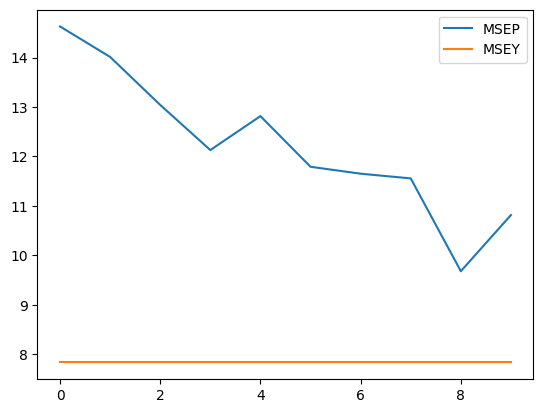

In [68]:
plt.plot(res1[1]['MSEP'], label='MSEP')
plt.plot(res1[1]['MSEY'], label='MSEY')
plt.legend()
plt.show()

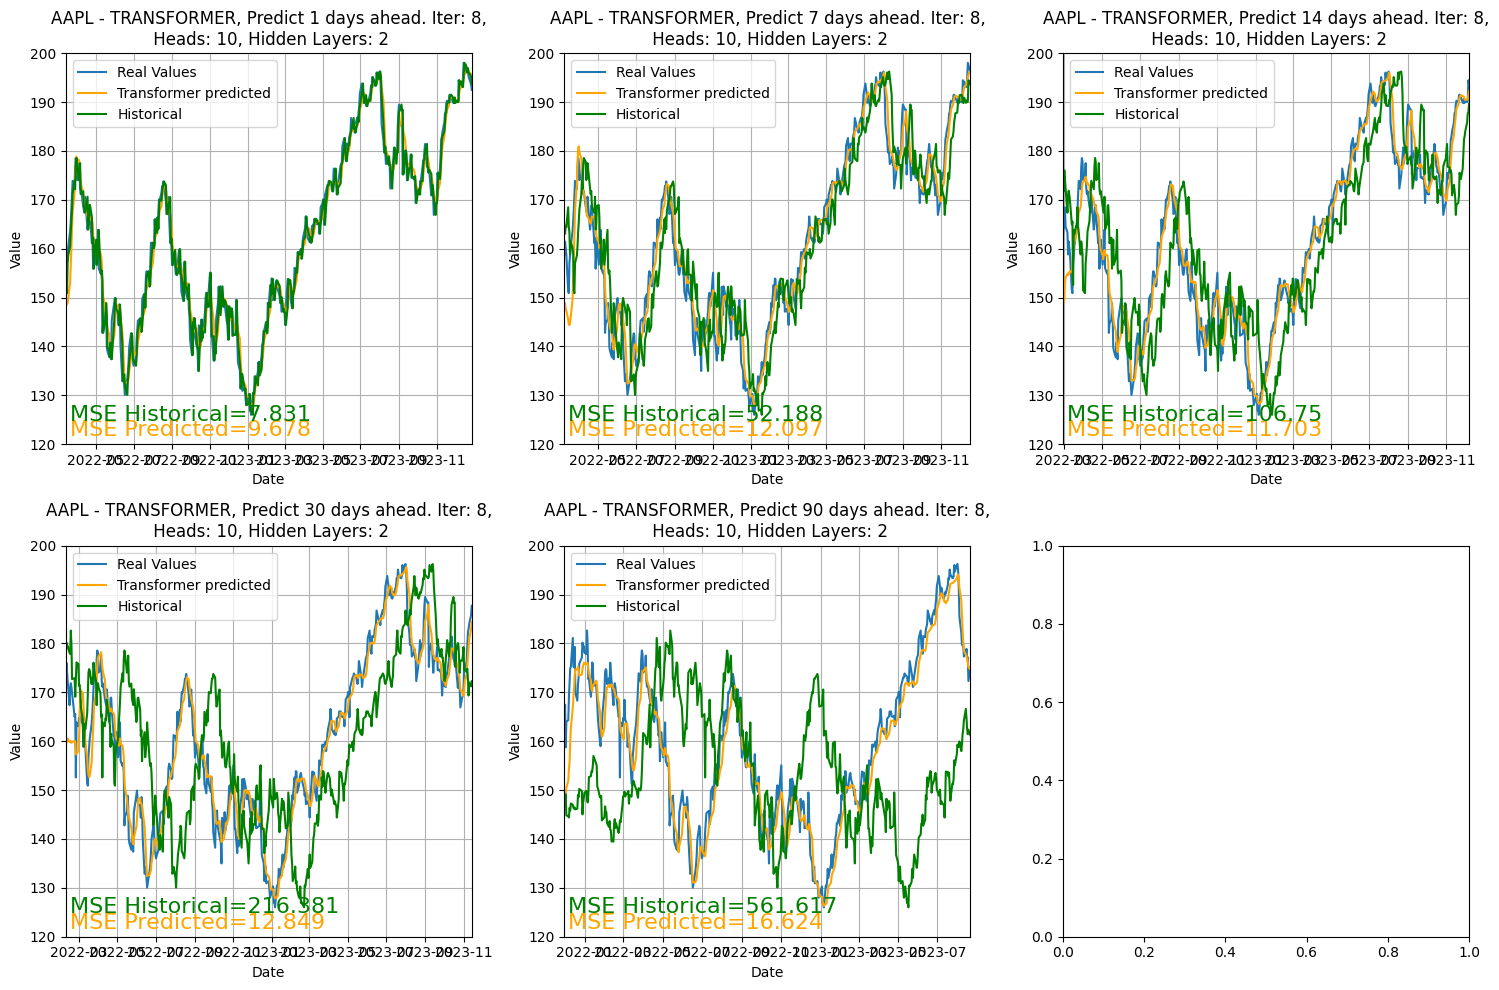

In [76]:
def plot_res(ax, DY, msep, msey, stck, mdl, itr):
    ax.plot(DY.index, DY.Y_real, label="Real Values")
    p2 = ax.plot(DY.index, DY.Y_predicted, label="Transformer predicted", color='orange')
    p3 = ax.plot(DY.index, DY.Y_yesterday, label="Historical", color='green')
    
    ax.set_title(f'{stck} - {mdl.upper()}, Predict {ahead} days ahead. Iter: {itr},\n Heads: {num_heads}, Hidden Layers: {num_layers}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)
    
    # Agregar texto
    ax.text(.01, .01, 'MSE Predicted=' + str(round(msep,3)), transform=ax.transAxes, ha='left', va='bottom', fontsize=16, color='#FFA500')
    ax.text(.01, .05, 'MSE Historical=' + str(round(msey,3)), transform=ax.transAxes, fontsize=16, ha='left', va='bottom', color='green')

# Código para generar subgráficos para cada valor en la lista lahead
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ahead in enumerate(lahead):
    res1 = tot_res['Transformer_OUT_MODEL']
    mdl = 'transformer'
    stck = 'AAPL'
    itr = 8
    DYs = res1[ahead]['DY']
    DY = DYs.loc[itr]
    msep = res1[ahead]['MSEP'][itr]
    msey = res1[ahead]['MSEY'][itr]
    row = i // 3
    col = i % 3
    plot_res(axs[row, col], DY, msep, msey, stck, mdl, itr)
    
    # Ajustar los límites del eje X y Y
    axs[row, col].set_xlim(DY.index.min(), DY.index.max())  # Ajustar los límites del eje X
    axs[row, col].set_ylim(120, 200)

path = f'D:\Escritorio\TFG\Finance-AI\Figures/{tr_tst}/'
if not os.path.exists(path):
    os.makedirs(path)

plt.tight_layout()
#plt.show()
figfich = path + f'{mdl}-{stck}-{itr}-{num_heads}-{num_layers}.png'.format(mdl, stck, itr)
plt.savefig(figfich)
